## Cyril Gebara - Individual Assignment - Energy
### Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
energy = pd.read_csv("energy.csv")

### Calculate the following

#### Shape (1 p)

In [3]:
energy.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [4]:
# use filter or list comprehensions or for loops or dark magic

energycolumns = energy.columns

# using for loop
features = []
for column in energycolumns:
    if "datetime" not in column:
        features.append(column)
print(features) 

#using lambda
features = list(filter(lambda col: "datetime" not in col, energycolumns))
print(features)

  

['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']
['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


#### How many NaN are there in the dataset? (1 p)

In [5]:
# "Dealing with missing values" in the slides
nulls = energy.isnull().sum().sum()
print(f"{nulls} nulls available")

2541 nulls available


#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [6]:
# pandas datetime functionalities
energy["datetime"] = pd.to_datetime(energy["datetime"], utc=True)
energy.dtypes

datetime        datetime64[ns, UTC]
power_demand                float64
nuclear                     float64
gas                         float64
solar                       float64
hydro                       float64
coal                        float64
wind                        float64
spot_price                  float64
dtype: object

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [7]:
# pandas datetime functionalities
energy["year"] = energy["datetime"].dt.year
energy["month"] = energy["datetime"].dt.month
energy["day"] = energy["datetime"].dt.day
energy["hour"] = energy["datetime"].dt.hour
energy["weekday"] = energy["datetime"].dt.weekday

#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [8]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions
energy["weekend"] = energy["weekday"].map(lambda x: x>4)

#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [9]:
# features is the list you created in the beginning
energy.groupby("weekday").mean()[features]

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [10]:
# function that returns the season out

from datetime import date

def season(date_to_convert):  # the function expects a datetime.date object as input
    
    dateyear = date_to_convert.year
    
    seasons = [
        ("winter", date(dateyear, 12, 21), date(dateyear, 12, 31)),
        ("spring", date(dateyear, 3, 20), date(dateyear, 6, 21)),
        ("summer", date(dateyear, 6, 22), date(dateyear, 9, 21)),
        ("fall", date(dateyear, 9, 22), date(dateyear, 12, 20)),
        ("winter", date(dateyear, 1, 1), date(dateyear, 3, 19))
    ]
    for elem in seasons:
        if date_to_convert>=elem[1] and date_to_convert<=elem[2]:  
            return elem[0]
        

In [11]:
#creating season column using the above function
energy["season"] = energy["datetime"].map(season)

#### Calculate average demand and spot_price for each season (1 p)

In [12]:
energy.groupby("season")[["power_demand", "spot_price"]].mean()

,power_demand,spot_price
season,,
fall,28242.443241,43.562639
spring,27157.150399,48.790598
summer,29235.177536,46.509909
winter,29481.103975,52.033360


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

In [13]:
null = energy["solar"].isnull().sum()
print(f"{null} nulls for solar since at night there is no sun so the solar panel doesn't work.")

2392 nulls for solar since at night there is no sun so the solar panel doesn't work.


#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [14]:
# Income = energy_generated * price
# Cost = energy_bought * price


costandincomedict = {}
filteredwithoutprice = [feature for feature in features if feature != "spot_price"]

for col in filteredwithoutprice:
    costandincomedict[col] = np.sum(energy[col] * energy["spot_price"])
    
costandincomedict


{'power_demand': 12115827296.223999,
 'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

Hourly average power demand


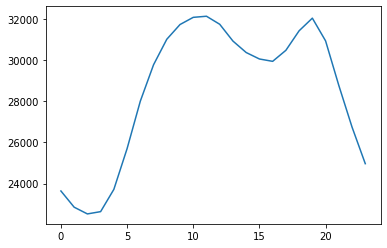

Hourly average spot price


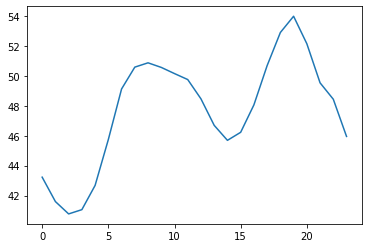

In [15]:
df_avg = energy.groupby("hour").mean()[["power_demand", "spot_price"]]

print("Hourly average power demand")
plt.plot(df_avg.index, df_avg["power_demand"])
plt.show()

print("Hourly average spot price")
plt.plot(df_avg.index, df_avg["spot_price"])
plt.show()

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [16]:
energy["windcategory"] = pd.cut(energy["wind"], bins=3, labels=["low", "mid", "high"])
energy.tail()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season,windcategory
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,2019,12,30,19,0,False,winter,low
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42,2019,12,30,20,0,False,winter,low
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76,2019,12,30,21,0,False,winter,low
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88,2019,12,30,22,0,False,winter,low
8736,2019-12-30 23:00:00+00:00,24350.5,7099.0,3765.9,NaN,6403.5,528.0,1927.2,37.55,2019,12,30,23,0,False,winter,low


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [17]:
energygenerators = ["nuclear", "gas", "solar", "hydro", "coal", "wind"]
generator = energy[energygenerators].sum().sort_values(ascending=False)
max = generator[0]
min = generator[-1]
print(f"The power type that generates the most energy is nuclear with {max}")
print(f"The power type that generates the least energy is solar with {min}")

The power type that generates the most energy is nuclear with 55758092.99999979
The power type that generates the least energy is solar with 8878077.800000014
